<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Incomplete_Sentence_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify whether a Sentence has been Finished or Not

In [13]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string
string.punctuation
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [14]:
df = pd.read_json('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/finished_sentences.json')

In [15]:
df.shape

(53149, 2)

In [16]:
df.head()

,sentence,is_finished
0,"Apple supplier AMS cuts forecast, indicating p...",Finished
1,U.S. factory and services activity quicken in ...,Finished
2,Exclusive: Tesla expects global shortage of el...,Unfinished
3,"World stocks climb on China trade relief, whil...",Finished
4,"Boeing, J&J, dismal China data drag Wall Stree...",Finished


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53149 entries, 0 to 53148
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentence     53149 non-null  object
 1   is_finished  53149 non-null  object
dtypes: object(2)
memory usage: 830.6+ KB


#✅ Natural Language Processing

In [18]:
#selection data
text = df[['sentence']]
text.head()

,sentence
0,"Apple supplier AMS cuts forecast, indicating p..."
1,U.S. factory and services activity quicken in ...
2,Exclusive: Tesla expects global shortage of el...
3,"World stocks climb on China trade relief, whil..."
4,"Boeing, J&J, dismal China data drag Wall Stree..."


## Removal Punctuation

In [19]:
#defining to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

text['sentence_clean'] = text['sentence'].apply(lambda text: remove_punctuation(text))
text.head()

,sentence,sentence_clean
0,"Apple supplier AMS cuts forecast, indicating p...",Apple supplier AMS cuts forecast indicating po...
1,U.S. factory and services activity quicken in ...,US factory and services activity quicken in No...
2,Exclusive: Tesla expects global shortage of el...,Exclusive Tesla expects global shortage of ele...
3,"World stocks climb on China trade relief, whil...",World stocks climb on China trade relief while...
4,"Boeing, J&J, dismal China data drag Wall Stree...",Boeing JJ dismal China data drag Wall Street l...


## Lower Casing

In [20]:
#setting lower case
text['sentence_lower'] = text['sentence_clean'].str.lower()
text.head()

,sentence,sentence_clean,sentence_lower
0,"Apple supplier AMS cuts forecast, indicating p...",Apple supplier AMS cuts forecast indicating po...,apple supplier ams cuts forecast indicating po...
1,U.S. factory and services activity quicken in ...,US factory and services activity quicken in No...,us factory and services activity quicken in no...
2,Exclusive: Tesla expects global shortage of el...,Exclusive Tesla expects global shortage of ele...,exclusive tesla expects global shortage of ele...
3,"World stocks climb on China trade relief, whil...",World stocks climb on China trade relief while...,world stocks climb on china trade relief while...
4,"Boeing, J&J, dismal China data drag Wall Stree...",Boeing JJ dismal China data drag Wall Street l...,boeing jj dismal china data drag wall street l...


## Tokenization

In [21]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

#applying function to the column
text['sentence_tokenied'] = text['sentence_lower'].apply(lambda x: tokenization(x))
text.head()

,sentence,sentence_clean,sentence_lower,sentence_tokenied
0,"Apple supplier AMS cuts forecast, indicating p...",Apple supplier AMS cuts forecast indicating po...,apple supplier ams cuts forecast indicating po...,[apple supplier ams cuts forecast indicating p...
1,U.S. factory and services activity quicken in ...,US factory and services activity quicken in No...,us factory and services activity quicken in no...,[us factory and services activity quicken in n...
2,Exclusive: Tesla expects global shortage of el...,Exclusive Tesla expects global shortage of ele...,exclusive tesla expects global shortage of ele...,[exclusive tesla expects global shortage of el...
3,"World stocks climb on China trade relief, whil...",World stocks climb on China trade relief while...,world stocks climb on china trade relief while...,[world stocks climb on china trade relief whil...
4,"Boeing, J&J, dismal China data drag Wall Stree...",Boeing JJ dismal China data drag Wall Street l...,boeing jj dismal china data drag wall street l...,[boeing jj dismal china data drag wall street ...


## Removal Stopwords

In [22]:
#stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
text['no_stopword'] = text['sentence_tokenied'].apply(lambda x:remove_stopwords(x))
text.head()

,sentence,sentence_clean,sentence_lower,sentence_tokenied,no_stopword
0,"Apple supplier AMS cuts forecast, indicating p...",Apple supplier AMS cuts forecast indicating po...,apple supplier ams cuts forecast indicating po...,[apple supplier ams cuts forecast indicating p...,[apple supplier ams cuts forecast indicating p...
1,U.S. factory and services activity quicken in ...,US factory and services activity quicken in No...,us factory and services activity quicken in no...,[us factory and services activity quicken in n...,[us factory and services activity quicken in n...
2,Exclusive: Tesla expects global shortage of el...,Exclusive Tesla expects global shortage of ele...,exclusive tesla expects global shortage of ele...,[exclusive tesla expects global shortage of el...,[exclusive tesla expects global shortage of el...
3,"World stocks climb on China trade relief, whil...",World stocks climb on China trade relief while...,world stocks climb on china trade relief while...,[world stocks climb on china trade relief whil...,[world stocks climb on china trade relief whil...
4,"Boeing, J&J, dismal China data drag Wall Stree...",Boeing JJ dismal China data drag Wall Street l...,boeing jj dismal china data drag wall street l...,[boeing jj dismal china data drag wall street ...,[boeing jj dismal china data drag wall street ...


## Stemming

In [23]:
#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

#applying the function
text['sentence_stemmend'] = text['no_stopword'].apply(lambda x: stemming(x))
text.head()

,sentence,sentence_clean,sentence_lower,sentence_tokenied,no_stopword,sentence_stemmend
0,"Apple supplier AMS cuts forecast, indicating p...",Apple supplier AMS cuts forecast indicating po...,apple supplier ams cuts forecast indicating po...,[apple supplier ams cuts forecast indicating p...,[apple supplier ams cuts forecast indicating p...,[apple supplier ams cuts forecast indicating p...
1,U.S. factory and services activity quicken in ...,US factory and services activity quicken in No...,us factory and services activity quicken in no...,[us factory and services activity quicken in n...,[us factory and services activity quicken in n...,[us factory and services activity quicken in n...
2,Exclusive: Tesla expects global shortage of el...,Exclusive Tesla expects global shortage of ele...,exclusive tesla expects global shortage of ele...,[exclusive tesla expects global shortage of el...,[exclusive tesla expects global shortage of el...,[exclusive tesla expects global shortage of el...
3,"World stocks climb on China trade relief, whil...",World stocks climb on China trade relief while...,world stocks climb on china trade relief while...,[world stocks climb on china trade relief whil...,[world stocks climb on china trade relief whil...,[world stocks climb on china trade relief whil...
4,"Boeing, J&J, dismal China data drag Wall Stree...",Boeing JJ dismal China data drag Wall Street l...,boeing jj dismal china data drag wall street l...,[boeing jj dismal china data drag wall street ...,[boeing jj dismal china data drag wall street ...,[boeing jj dismal china data drag wall street ...


## Lemmatizing

In [24]:
#defining the object for lemmatizing
lemmatizer = WordNetLemmatizer()

#defining a function for lemmatizing
def lemmatize_words(text):
    lemma_text = [lemmatizer.lemmatize(word) for word in text]
    return lemma_text
                
#applying the function
text['sentence_lemmatized'] = text['sentence_stemmend'].apply(lambda text: lemmatize_words(text))
text.head()

,sentence,sentence_clean,sentence_lower,sentence_tokenied,no_stopword,sentence_stemmend,sentence_lemmatized
0,"Apple supplier AMS cuts forecast, indicating p...",Apple supplier AMS cuts forecast indicating po...,apple supplier ams cuts forecast indicating po...,[apple supplier ams cuts forecast indicating p...,[apple supplier ams cuts forecast indicating p...,[apple supplier ams cuts forecast indicating p...,[apple supplier ams cuts forecast indicating p...
1,U.S. factory and services activity quicken in ...,US factory and services activity quicken in No...,us factory and services activity quicken in no...,[us factory and services activity quicken in n...,[us factory and services activity quicken in n...,[us factory and services activity quicken in n...,[us factory and services activity quicken in n...
2,Exclusive: Tesla expects global shortage of el...,Exclusive Tesla expects global shortage of ele...,exclusive tesla expects global shortage of ele...,[exclusive tesla expects global shortage of el...,[exclusive tesla expects global shortage of el...,[exclusive tesla expects global shortage of el...,[exclusive tesla expects global shortage of el...
3,"World stocks climb on China trade relief, whil...",World stocks climb on China trade relief while...,world stocks climb on china trade relief while...,[world stocks climb on china trade relief whil...,[world stocks climb on china trade relief whil...,[world stocks climb on china trade relief whil...,[world stocks climb on china trade relief whil...
4,"Boeing, J&J, dismal China data drag Wall Stree...",Boeing JJ dismal China data drag Wall Street l...,boeing jj dismal china data drag wall street l...,[boeing jj dismal china data drag wall street ...,[boeing jj dismal china data drag wall street ...,[boeing jj dismal china data drag wall street ...,[boeing jj dismal china data drag wall street ...


# ✅ Sentiment Analysis

In [25]:
df_new = text[['sentence_clean']]
df_new.head()

,sentence_clean
0,Apple supplier AMS cuts forecast indicating po...
1,US factory and services activity quicken in No...
2,Exclusive Tesla expects global shortage of ele...
3,World stocks climb on China trade relief while...
4,Boeing JJ dismal China data drag Wall Street l...


In [26]:
#create function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#apply function to data 
df_new['subjectivity'] = df_new['sentence_clean'].apply(getSubjectivity)
df_new['polarity'] = df_new['sentence_clean'].apply(getPolarity)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,sentence_clean,subjectivity,polarity
0,Apple supplier AMS cuts forecast indicating po...,0.600000,-0.4
1,US factory and services activity quicken in No...,0.000000,0.0
2,Exclusive Tesla expects global shortage of ele...,0.000000,0.0
3,World stocks climb on China trade relief while...,0.000000,0.0
4,Boeing JJ dismal China data drag Wall Street l...,0.070833,-0.1


In [27]:
#create function to get sentiment data
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

#apply function to data
df_new['sentiment'] = df_new['polarity'].apply(getSentiment)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,sentence_clean,subjectivity,polarity,sentiment
0,Apple supplier AMS cuts forecast indicating po...,0.600000,-0.4,Negative
1,US factory and services activity quicken in No...,0.000000,0.0,Neutral
2,Exclusive Tesla expects global shortage of ele...,0.000000,0.0,Neutral
3,World stocks climb on China trade relief while...,0.000000,0.0,Neutral
4,Boeing JJ dismal China data drag Wall Street l...,0.070833,-0.1,Negative


# ✅ Visualization

In [28]:
#selection data
join = (df['is_finished'], df_new['sentiment'])
sentiment = pd.concat(join, axis = True)
sentiment.head()

,is_finished,sentiment
0,Finished,Negative
1,Finished,Neutral
2,Unfinished,Neutral
3,Finished,Neutral
4,Finished,Negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


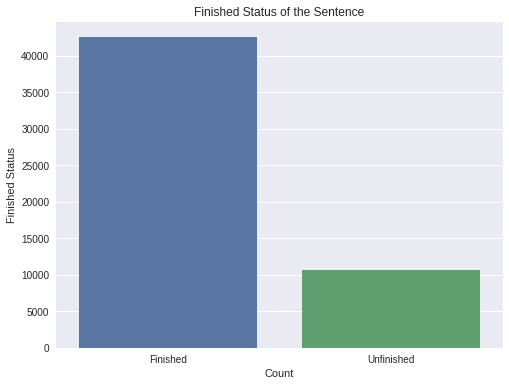

In [29]:
#visualize track title
plt.figure(figsize = (8,6))
sns.countplot(df['is_finished'])
plt.title("Finished Status of the Sentence")
plt.xlabel("Count")
plt.ylabel("Finished Status")
plt.show()

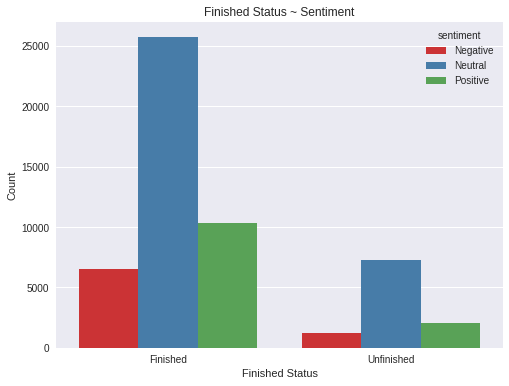

In [30]:
#group finished status & sentiment
status_sentiment = sentiment.groupby(['is_finished', 'sentiment']).size().reset_index(name = 'Count')

#visualize finished status ~ sentiment
plt.figure(figsize = (8,6))
sns.barplot(data = status_sentiment, x = 'is_finished', y = 'Count', hue = 'sentiment', palette = 'Set1')
plt.title("Finished Status ~ Sentiment")
plt.xlabel("Finished Status")
plt.ylabel("Count")
plt.show()

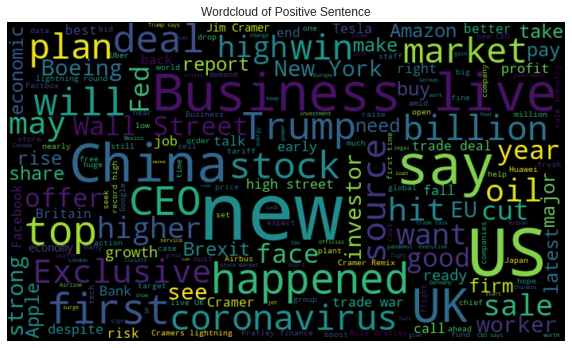

In [31]:
#visualize positive sentiment of sentence
positive = " ".join(df_new[df_new.sentiment == 'Positive']['sentence_clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100).generate(positive)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Positive Sentence")
plt.axis('off')
plt.show()

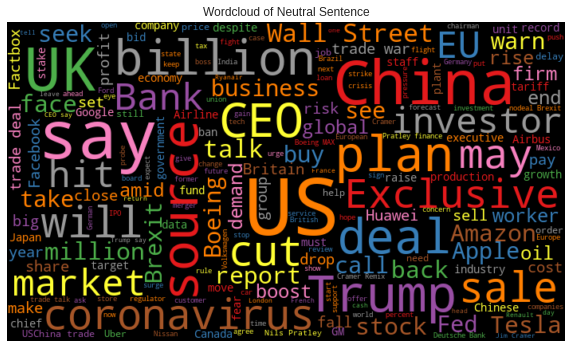

In [32]:
#visualize neutral sentiment of sentence
neutral = " ".join(df_new[df_new.sentiment == 'Neutral']['sentence_clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, colormap = 'Set1').generate(neutral)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Neutral Sentence")
plt.axis('off')
plt.show()

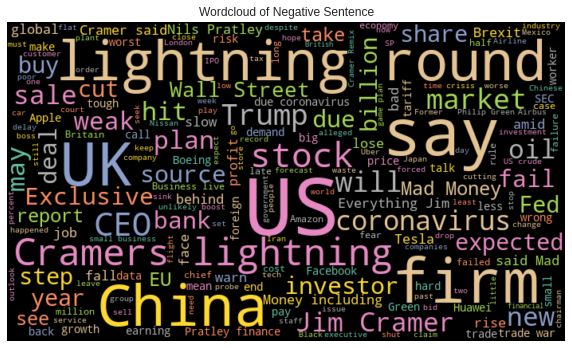

In [33]:
#visualize negative sentiment of sentence
negative = " ".join(df_new[df_new.sentiment == 'Negative']['sentence_clean'].values)
w = WordCloud(width = 700, height = 400, random_state = 10, max_font_size = 100, colormap = 'Set2').generate(negative)

plt.figure(figsize = (10,6))
plt.imshow(w, interpolation = "bilinear")
plt.title("Wordcloud of Negative Sentence")
plt.axis('off')
plt.show()

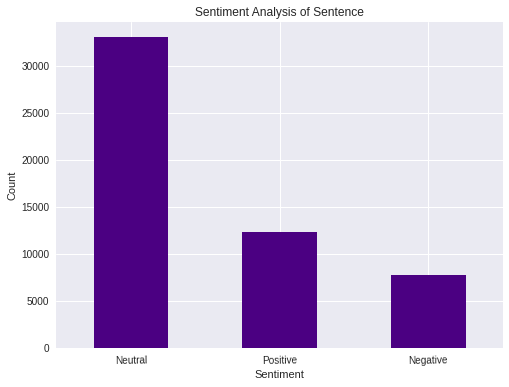

In [34]:
#visualize sentiment
plt.figure(figsize = (8,6))
plt.xlabel('Sentiment')
plt.ylabel('Count')
chart = df_new['sentiment'].value_counts().plot(kind = 'bar', color = 'indigo')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 1)
plt.title("Sentiment Analysis of Sentence")
plt.show()

# ✅ Reccurent Neural Network Model

In [35]:
#handling categorical data
df['is_finished'] = df['is_finished'].astype('category').cat.codes
df.head()

,sentence,is_finished
0,"Apple supplier AMS cuts forecast, indicating p...",0
1,U.S. factory and services activity quicken in ...,0
2,Exclusive: Tesla expects global shortage of el...,1
3,"World stocks climb on China trade relief, whil...",0
4,"Boeing, J&J, dismal China data drag Wall Stree...",0


In [36]:
#data preprocessing
X, y = (df['sentence'].values, df['is_finished'].values)

#feature scaling
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen = 100, padding = 'post')
X_pad

array([[  111,  1040,  3281, ...,     0,     0,     0],
       [    7,     4,   322, ...,     0,     0,     0],
       [   40,   101,   366, ...,     0,     0,     0],
       ...,
       [ 1386, 29918,   322, ...,     0,     0,     0],
       [ 1032,   386,   567, ...,     0,     0,     0],
       [    8,   239,   170, ...,     0,     0,     0]], dtype=int32)

In [37]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37204, 100)
(37204,)
(15945, 100)
(15945,)


In [38]:
#check validation
batch_size = 64
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]

X_test = X_train[:batch_size]
y_test = y_train[:batch_size]

In [39]:
#build model
vocabulary_size = len(tk.word_counts.keys()) + 1
max_words = 100

embedding_size = 32
regressor = Sequential()
regressor.add(Embedding(vocabulary_size, embedding_size, input_length = max_words))
regressor.add(SimpleRNN(200))
regressor.add(Dense(1, activation = 'sigmoid'))
regressor.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [40]:
#fitting model
regressor.fit(X_train1, y_train1, validation_data = (X_test, y_test), batch_size = 128, epochs = 5)

Epoch 1/5
291/291 [==============================] - 53s 175ms/step - loss: 0.5048 - accuracy: 0.7988 - val_loss: 0.6038 - val_accuracy: 0.7188
Epoch 2/5
291/291 [==============================] - 49s 167ms/step - loss: 0.5017 - accuracy: 0.8008 - val_loss: 0.6360 - val_accuracy: 0.7188
Epoch 3/5
291/291 [==============================] - 50s 172ms/step - loss: 0.5012 - accuracy: 0.8008 - val_loss: 0.6139 - val_accuracy: 0.7188
Epoch 4/5
291/291 [==============================] - 50s 171ms/step - loss: 0.5012 - accuracy: 0.8008 - val_loss: 0.6382 - val_accuracy: 0.7188
Epoch 5/5
291/291 [==============================] - 50s 171ms/step - loss: 0.5011 - accuracy: 0.8008 - val_loss: 0.6056 - val_accuracy: 0.7188


In [41]:
#result of summary model
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           957408    
                                                                 
 simple_rnn (SimpleRNN)      (None, 200)               46600     
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 1,004,209
Trainable params: 1,004,209
Non-trainable params: 0
_________________________________________________________________


In [42]:
#accuracy score
score = regressor.evaluate(X_test, y_test, verbose = 0)
print('Accuracy Score : ', score[1])

Accuracy Score :  0.71875


In [43]:
#prediction
y_pred = regressor.predict(X_test, verbose = 0)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


[[46  0]
 [18  0]]


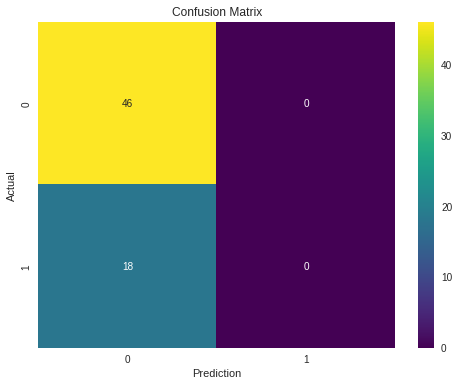

In [44]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [45]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        46
           1       0.00      0.00      0.00        18

    accuracy                           0.72        64
   macro avg       0.36      0.50      0.42        64
weighted avg       0.52      0.72      0.60        64



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
